### p01e GDA:


In [1]:
# use DS1 for values 
import matplotlib.pyplot as plt
import util

ds1_training_set_path = '../data/ds1_train.csv'
ds1_valid_set_path = '../data/ds1_valid.csv'
ds2_training_set_path = '../data/ds2_train.csv'
ds2_valid_set_path = '../data/ds2_valid.csv'
save_path = "../save_runs"

x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

In [2]:
import numpy as np
import util

from linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_valid, y_valid = util.load_dataset(eval_path, add_intercept=True)
    model = GDA()
    model.fit(x_train, y_train)
    # Plot data and decision boundary
    util.plot(x_train, y_train, model.theta, save_path=pred_path + '/p01e.png')
    # *** START CODE HERE ***
    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        # no need for a training loop
        m, n = x.shape
        phi = np.sum(y) / m
        # use a boolean mask to get output vector based on desired value
        # we want (1, 2)
        mu_0 = (np.dot((y==0).astype(int).T, x).reshape((-1, 1))) / (np.sum((y==0).astype(int).reshape((-1, 1))))
        ## same thing for mu_1
        mu_1 = (np.dot((y==1).astype(int).T, x).reshape((-1, 1))) / np.sum((y==1).astype(int).reshape((-1, 1))) 
        
        # now for covariance matrix 
        cov_matrix = (np.dot(x.T - np.where((y==1).astype(int), mu_1, mu_0), (x.T - np.where((y==1).astype(int), mu_1, mu_0)).T)) / m
        cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6

        # now for theta 
        self.theta = np.dot(np.linalg.inv(cov_matrix), (mu_1 - mu_0))
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        # log reg prediction 
        return 1 / (1 + np.exp(-(np.dot(self.theta.T, x.T))))
        # *** END CODE HERE


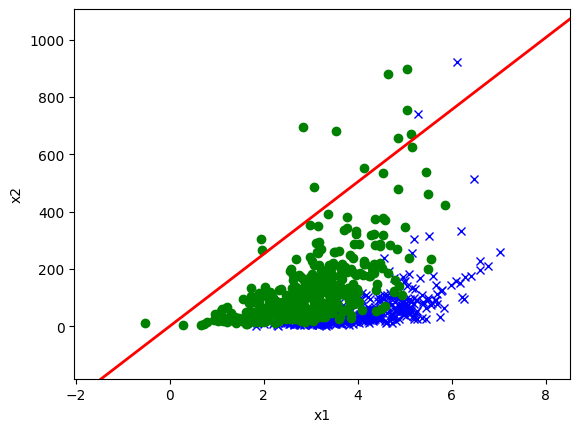

In [3]:
main(ds1_training_set_path, ds1_valid_set_path, save_path)

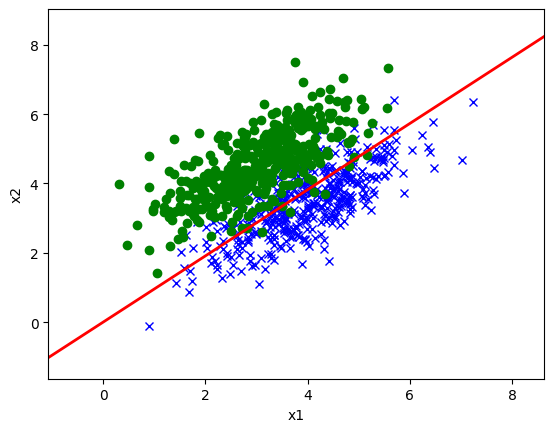

In [4]:
main(ds2_training_set_path, ds2_training_set_path, save_path)

[[-6.26018491  2.47707251 -0.0299125 ]]


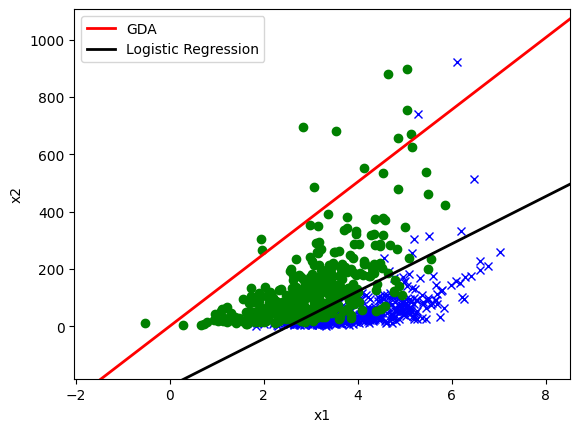

In [5]:
from prev_problems_modules import p01b_logreg
### 1f: create a plot of the training data with x_1 on the horizontal axis, and x_2
def plot_1f(x, y, theta, theta_2, label_1, label_2, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2, label=label_1)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # decision boundary 2
    margin1_b = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2_b = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1_b = np.arange(min(x[:, -2])-margin1_b, max(x[:, -2])+margin1_b, 0.01)
    x2_b = -(theta_2[0] / theta_2[2] * correction + theta_2[1] / theta_2[2] * x1_b)
    plt.plot(x1_b, x2_b, c='black', linewidth=2, label=label_2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1_b)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2_b)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc="upper left")
    #if save_path is not None:
    #    plt.savefig(save_path)

x_train, y_train = util.load_dataset('../data/ds1_train.csv', add_intercept=True)
# create GDA and logistic regression models 
gda_model = GDA()
gda_model.fit(x_train, y_train)
log_model = p01b_logreg.LogisticRegression()
log_model.fit(x_train, y_train)
plot_1f(x_train, y_train, gda_model.theta, log_model.theta.T, 'GDA', 'Logistic Regression')

### p01g GDA:

[[ 2.38425454  3.6371206  -3.81234337]]


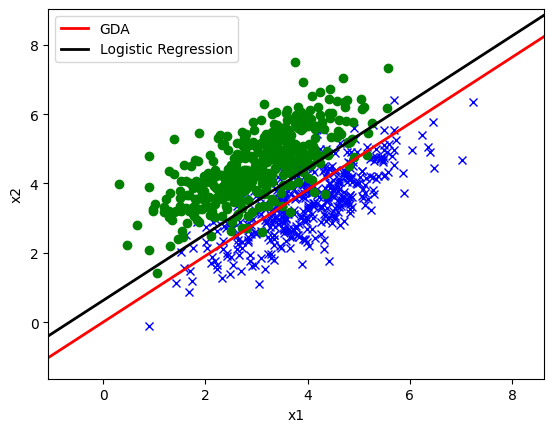

In [7]:

x_train, y_train = util.load_dataset('../data/ds2_train.csv', add_intercept=True)
# create GDA and logistic regression models 
gda_model = GDA()
gda_model.fit(x_train, y_train)
log_model = p01b_logreg.LogisticRegression()
log_model.fit(x_train, y_train)
plot_1f(x_train, y_train, gda_model.theta, log_model.theta.T, 'GDA', 'Logistic Regression')


- GDA performed worse on dataset 1. The reason is likely because dataset 1 does not follow a Gaussian distribution. 